In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import scikitplot as skplt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
Data = pd.read_csv("/content/IEE520_Train.csv")

Dealing with missing values

In [ ]:
Data['x1'].value_counts()

0       7033
1        822
4        603
None     578
5        369
2        320
3        267
6          5
7          3
Name: x1, dtype: int64

In [ ]:
Data['x1']=Data['x1'].replace("None",'8')

In [ ]:
Data['x4'].value_counts()

1       1268
4       1234
5       1226
8       1120
3       1108
2       1022
7        613
None     581
10       479
6        455
9        338
0        324
12       185
11        47
Name: x4, dtype: int64

In [ ]:
Data['x4']=Data['x4'].replace("None",'13')

In [ ]:
Data['x8'].value_counts()

0       8919
20       197
None     174
15        80
5         46
3         46
4         43
12        32
7         32
36        29
8         27
2         25
31        25
11        24
10        24
16        23
24        20
28        20
29        20
21        18
19        16
18        15
17        14
13        13
27        12
22        11
9          9
26         9
32         9
35         8
38         8
14         6
37         6
23         6
25         5
1          5
33         5
34         5
6          5
39         5
30         3
40         1
Name: x8, dtype: int64

In [ ]:
Data['x8']=Data['x8'].replace("None",'41')

In [ ]:
X = Data.iloc[ :, : -1].values
Y = Data.iloc[ :, -1].values

Handling class imbalance

In [ ]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([7580, 2420]))

In [ ]:
X_new, y_new = SMOTE().fit_sample(X,Y)
y_new = pd.DataFrame(y_new)
X_new = pd.DataFrame(X_new)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(y_new,return_counts=True)

(array([0, 1]), array([7580, 7580]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 1)

Model

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.6min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 82.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
random_forest_final_model = RandomForestClassifier(bootstrap=False, n_estimators=400, min_samples_leaf=1, min_samples_split=2, max_depth=None, max_features='sqrt')
random_forest_final_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = random_forest_final_model.predict(X_test)

Confusion Matrix on test data: 


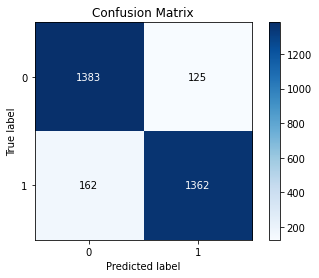

In [ ]:
print('Confusion Matrix on test data: ')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [ ]:
print('Accuracy on test data:')
print(accuracy_score(y_test, y_pred) )

Accuracy on test data:
0.9053430079155673


In [ ]:
Balanced_error_rate = ((125/(125+1383))+(162/(162+1362)))/2
print(Balanced_error_rate)

0.09459522964138767
